<a href="https://www.kaggle.com/code/islembenmaalem/data-analysis?scriptVersionId=114001207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <h1 style="font-family: Trebuchet MS; padding: 5px; font-size: 48px; color: gold; text-align: center; line-height: 1;"><b>Video Game Sales<span style="color: #000000"> Data Analysis </span></b><br><span style="color: gold; font-size: 24px"> (Islem) </span></h1>


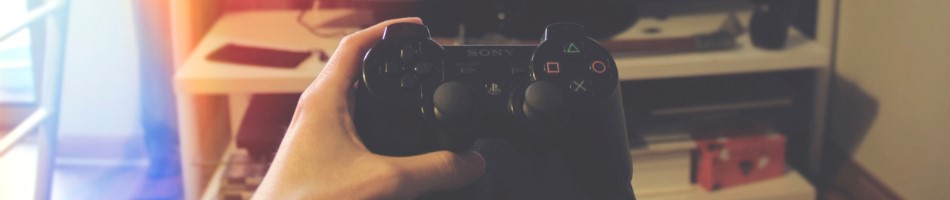

# **Introduction**
Hello, My name is Islem, this is my first public notebook Deep Analysis that I made, please leave me your feedback or give me your insight about this data, Hope you like it! In this notebook we're going to analyst  Video Game Sales Data by doing so we're going to get some insights.

I'm planning to go through feature (question) by feature and take a closer look at those features to inspect their relationships with previous features. So it's gonna take a while to finish this notebook with all features involved.

## **Table of Contents:**

1. [Context](#1)
2. [Import Libraries](#2)
3. [Read in Data Frame](#3)
4. [Data Preprocessing](#4)
    1. [Uniqueness Categorical Variables](#5)
    2. [How many missing data points do we have?](#6)
    3. [Clean up the Data!](#7)
    4. [Convert Year column](#9)
    5. [Recap Data](#10)
5. [Data Analysis](#11)
    1. [Univariate Analysis](#12)
    2. [Task:](#13)
        1. [Q: What was the best Year for sales? How much was earned that Year?](#12)
        2. [Q: What Genre sold the most?](#13)
        3. [Q: What video games are most often sold together?](#14)
        4. [Q: What Platform had the highest number of Global Sales? Why do these Platorms sell more than others?](#15)
        5. [What are the top 10 Publisher?](#16)
        6. [Evaluation of the Global Sales per publisher](#17)

<a id="1"></a>
# **Context**

video game sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. 
## **Content**
``Rank`` - Ranking of overall sales

``Name`` - The games name

``Platform`` - Platform of the games release (i.e. PC,PS4, etc.)

``Year`` - Year of the game's release

``Genre`` - Genre of the game

``Publisher`` - Publisher of the game

``NA_Sales`` - Sales in North America (in millions)

``EU_Sales`` - Sales in Europe (in millions)

``JP_Sales`` - Sales in Japan (in millions)

``Other_Sales`` - Sales in the rest of the world (in millions)

``Global_Sales`` - Total worldwide sales.
## **Task:**
* Q: What was the best Year for sales? How much was earned that Year?
* Q: What Genre sold the most?
* Q: What video games are most often sold together?
* Q: What Platform had the highest number of Global Sales? Why do these Platorms sell more than others?
* What are the top 10 Publisher?
* Evaluation of the Global Sales per publisher

<a id="2"></a>

# **Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
import warnings
warnings.filterwarnings('ignore')

<a id="3"></a>

# **Read in Data Frame**

Let's see the data and how it looks.

In [2]:
data = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv') # read data
data.head() # Checking the first 5 rows of data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
"Head"
data.head() # Checking the first 5 rows of data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
"Tail"
data.tail() # Checking the last 5 rows of data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


it looks like there's some missing values.

<a id="4"></a>

# **Data Preprocessing**

In [6]:
# getting the information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
data.shape

(16598, 11)

<a id="5"></a>

### **Uniqueness Categorical Variables**
Let's have a look at categorical variables. How many unique values of these variables.

In [8]:
categorical = data.select_dtypes(['category', 'object']).columns # getting the Uniqueness catrgorical variable
for col in categorical:
    print('{} : {} unique value(s)'.format(col, data[col].nunique()))

Name : 11493 unique value(s)
Platform : 31 unique value(s)
Genre : 12 unique value(s)
Publisher : 578 unique value(s)


<a id="6"></a>
### **How many missing data points do we have?**

In [9]:
missing_values_count=data.isna().sum()
missing_values_count

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(f"percent missing : {percent_missing:.2f}%")

percent missing : 0.18%


<a id="7"></a>
### **Clean up the Data!**

#### since this missing value is not too big, let's just drop the missing value, I think this will not affect the data since the data is big enough. 

In [11]:
# let's drop the rows of NaN data!
data = data.dropna()
# okay, let's check it again!
"NaN Value:"
data[data.isna().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


<a id="9"></a>

### **Convert Year column**

In [12]:
# convert the data
data['Year'] = data['Year'].astype('int64')
# and check it 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


<a id="10"></a>

### **Recap Data**
#### This is some point that we have.

* We have total  16598   and  11  columns
* The total of missing value that we have is  0.18019 %
* Name : 11493 unique value(s)
* Platform : 31 unique value(s)
* Genre : 12 unique value(s)
* Publisher : 578 unique value(s)

Next, we will try to do some exploration and visualization. 

<a id="11"></a>

# **Data Analysis**

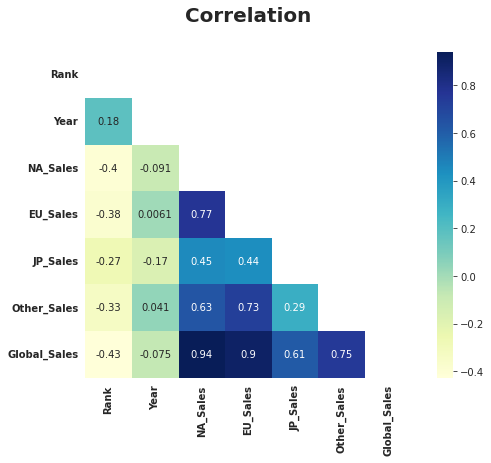

In [13]:
#correlation matrix
corrmat= data.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9,6))
    plt.title("Correlation", weight="bold", fontsize=20, pad=30) # title
    plt.xticks(weight="bold", fontsize=10) # x-ticks
    plt.yticks(weight="bold", fontsize=10); # y-ticks
    sns.heatmap(corrmat,cmap="YlGnBu",annot=True,mask=mask,square=True )

In [14]:
# Let's see the correlation from `Global_Sales`
(data.corr()['Global_Sales'] # transform it into data corr
           .sort_values(ascending=False) # sort values
           .to_frame() # change it into data frame
           .T) # transpose it

,Global_Sales,NA_Sales,EU_Sales,Other_Sales,JP_Sales,Year,Rank
Global_Sales,1.0,0.941269,0.903264,0.747964,0.612774,-0.074647,-0.426975


In [15]:
# statistical measure of the data without object type of data
data_numeric = data.describe(include=[np.number]) 
print("Statistical Measure of the Data in Numeric Data")
data_numeric

Statistical Measure of the Data in Numeric Data


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [16]:
# statistical measure of the data without numeric type of data
data_object = data.describe(exclude=[np.number])
print("Statistical Measure of the Data in Object / Str Data")
data_object

Statistical Measure of the Data in Object / Str Data


,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


<a id="12"></a>

## **Univariate Analysis**

<a id="13"></a>

## **Task:**

---
<a id="12"></a>

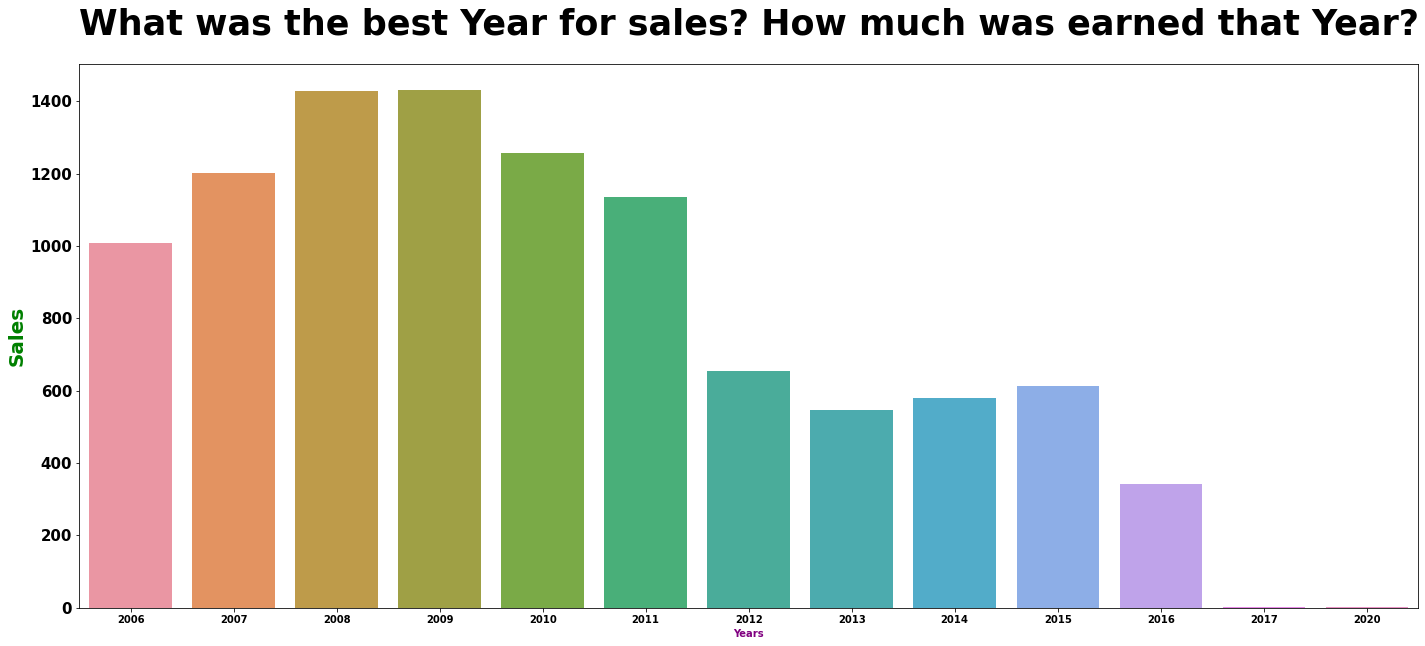

In [17]:
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes count plot 
sns.countplot(
    x="Year", 
    data=data.query("Year>2005")
    
)
plt.title( # title
    "What was the best Year for sales? How much was earned that Year?", 
    weight="bold", # weiqht
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Years", 
    weight="bold", # weight
    color="purple", # color
    fontsize=10, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=10 # font-size
)
plt.ylabel( # y-label
    "Sales", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

In [18]:
df1=data[['Genre','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df22=df1.melt(id_vars = ['Genre','Year'],var_name ='sales',value_name='sales_value').groupby('Year').sum().sort_values('sales_value')
df2=pd.concat([df22.head(1),df22.tail(1)],axis=0).groupby("Year").first()
df2.reset_index().iloc[:, [0,-1]].groupby("Year").first()

,sales_value
Year,
2008,678.49
2017,0.05


In [19]:
data.query("Year==2008").shape[0]

1428

In [20]:
data.query("Year==2017").shape[0]

3

## ***Answer:***
>   When viewed from the data above, $2008$  was the best year that had the highest number of sales,  compared to  $2017$  which was the worst year, but this is due to the lack of data in  $2017$  which caused a data imbalance.

* Now let's see the best sales per region and Genre that might be more informative

In [21]:
df1=data[['Genre','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df1=df1.query("Year>2005")
df3=df1.melt(id_vars=["Genre",'Year'],var_name='sale',value_name='sales_value')
data4=df3.sort_values('sales_value').groupby(['sale','Genre']).nth([-1])
df3=data4
df3

Year  sales_value
sale        Genre                          
EU_Sales    Action        2013         9.27
            Adventure     2007         2.00
            Fighting      2008         2.61
            Misc          2006         9.20
            Platform      2006         9.23
            Puzzle        2007         2.48
            Racing        2008        12.88
            Role-Playing  2006         4.52
            Shooter       2012         5.88
            Simulation    2009         6.42
            Sports        2006        29.02
            Strategy      2010         1.68
JP_Sales    Action        2009         3.96
            Adventure     2006         0.84
            Fighting      2008         2.66
            Misc          2009         3.67
            Platform      2006         6.50
            Puzzle        2006         1.35
            Racing        2008         3.79
            Role-Playing  2006         6.04
            Shooter       2015         1.44
            Simulation    2012         4.36
            Sports        2006         3.77
            Strategy      2008         0.50
NA_Sales    Action        2013         9.63
            Adventure     2007         3.28
            Fighting      2008         6.75
            Misc          2010        14.97
            Platform      2009        14.59
            Puzzle        2009         1.71
            Racing        2008        15.85
            Role-Playing  2006         6.42
            Shooter       2010         9.67
            Simulation    2006         3.13
            Sports        2006        41.49
            Strategy      2010         2.56
Other_Sales Action        2013         4.14
            Adventure     2007         0.83
            Fighting      2007         1.41
            Misc          2006         2.85
            Platform      2006         2.90
            Puzzle        2007         0.52
            Racing        2008         3.31
            Role-Playing  2006         1.74
            Shooter       2012         2.52
            Simulation    2009         0.71
            Sports        2006         8.46
            Strategy      2010         0.59

---

<a id="13"></a>

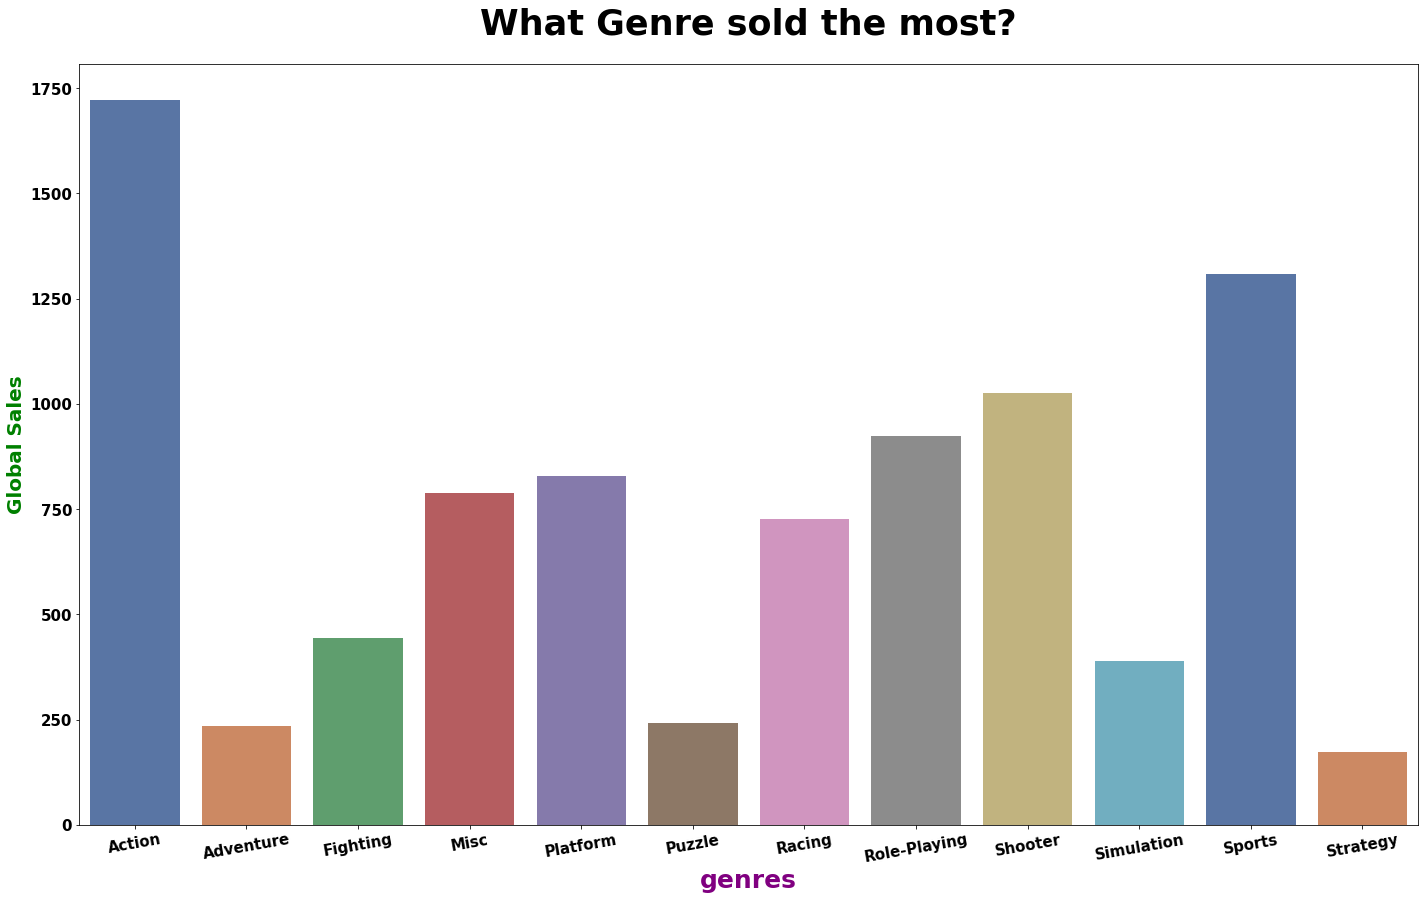

In [22]:
highest_number_of_sales = data.groupby('Genre').sum().astype('int')
plt.figure(figsize=(24, 14)) # figuring the size
# makes bar plot 
sns.barplot( # barplot
    x=highest_number_of_sales.index, # x-axis
    y=highest_number_of_sales["Global_Sales"], # y-axis
    data=highest_number_of_sales, # data
    palette="deep" # palette
)
plt.title( # title
    "What Genre sold the most?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "genres", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10
)
plt.ylabel( # y-label
    "Global Sales", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

In [23]:
data.query("Genre=='Action'").Global_Sales.sum()

1722.84

## ***Answer:***
> The genre that has the most sales in the above visualization is ``Action``, with total sales reaching 1722.84  .

---

<a id="14"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">What video games are most often sold together?
</p>

* we will take every region by itself then globally

In [24]:
from itertools import combinations
from collections import Counter
for i in ['NA_Sales',	'EU_Sales',	'JP_Sales','Other_Sales' ,'Global_Sales']:
     print("\n          ",i," : ")
# drop it using duplicated() funct
     d = data[data[i].duplicated(keep=False)]
# create a new column
     dd=data.groupby(i).Name.transform(lambda x: ','.join(x))
     d['Grouped'] = dd
        
# let's make a new variable
     d = d[[i, 'Grouped']].drop_duplicates()
# create a new variable for Counter
     count = Counter()
# make a for loop
     for row in d['Grouped']:
        row_list = row.split(',')
        count.update(Counter(combinations(row_list, 2)))
# and make another for loop    
     for key, value in count.most_common(10):
            print(key, value)



           NA_Sales  : 
('Terraria', 'Turbo: Super Stunt Squad') 35
('Terraria', 'Rugby World Cup 2015') 28
('Rugby World Cup 2015', 'Turbo: Super Stunt Squad') 28
('Monster High: New Ghoul in School', 'Turbo: Super Stunt Squad') 23
('Terraria', 'Rugby League Live 3') 22
('Clannad', 'Turbo: Super Stunt Squad') 22
('Terraria', 'Rugby Challenge 3') 21
('Terraria', 'Captain Morgane and the Golden Turtle') 21
('Terraria', 'Barbie and Her Sisters Puppy Rescue') 20
('Terraria', 'Clannad') 20

           EU_Sales  : 
('Major League Baseball 2K12', 'Clannad') 24
('Madden NFL 07', 'Major League Baseball 2K12') 23
('Wipeout 2', 'Major League Baseball 2K12') 23
('Wipeout 2', "You Don't Know Jack") 22
('Major League Baseball 2K10', 'Clannad') 20
('Wipeout 2', "Surf's Up") 20
('Wipeout 2', 'Puyo Puyo Tetris') 20
('Wipeout 2', 'Clannad') 20
('Madden NFL 07', "Surf's Up") 19
('Madden NFL 07', "You Don't Know Jack") 19

           JP_Sales  : 
(' PS3', 'Warhammer 40') 116
(' PS3', 'Angry Birds Star W

## ***Answer:***
> games that are often sold simultaneously are PS3 and Warhammer 40 which sold  in japan.

---

<a id="15"></a>

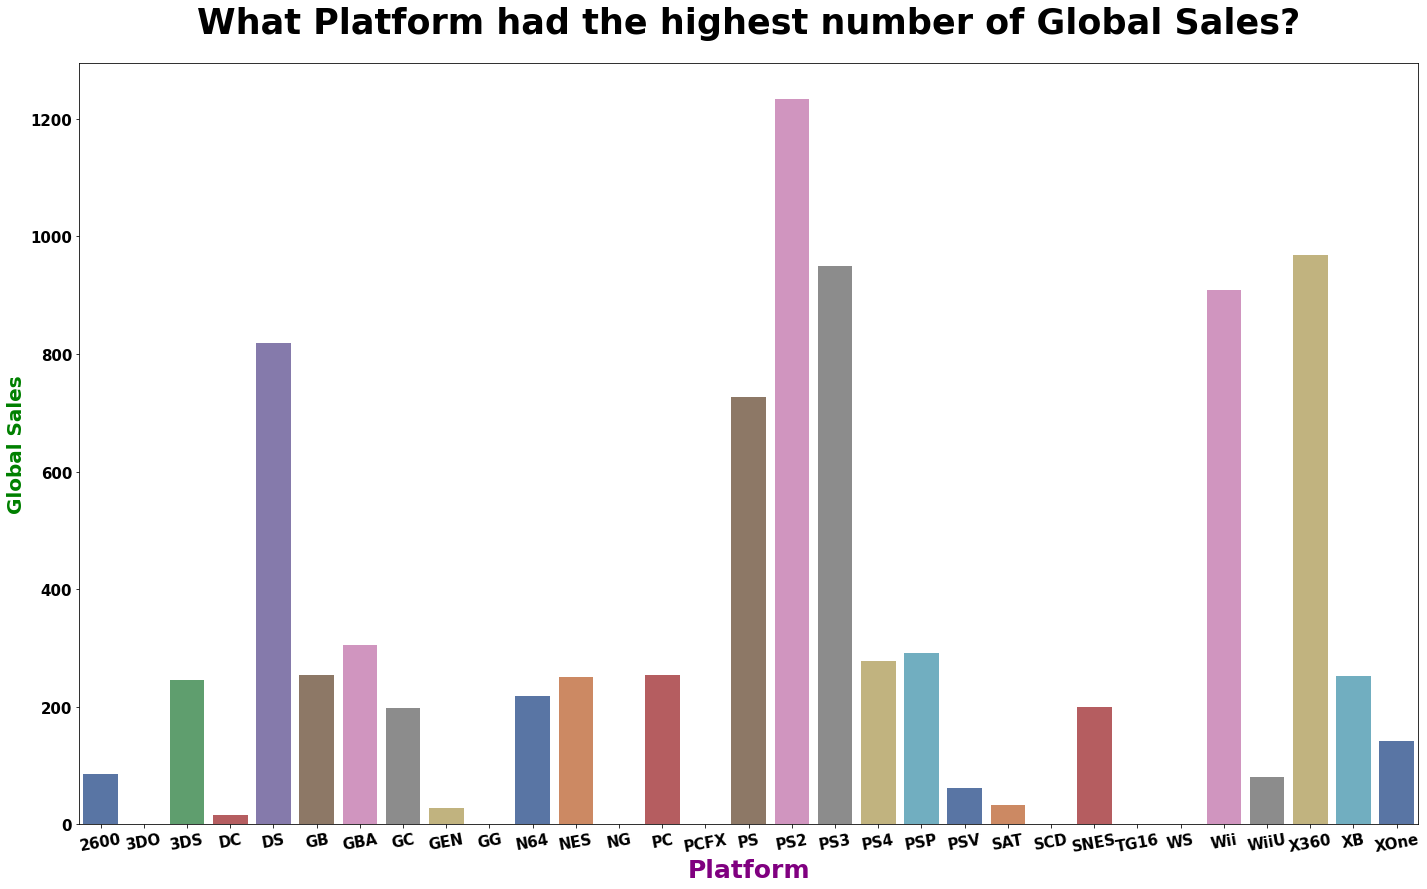

In [25]:
highest_number_of_sales = data.groupby('Platform').sum().astype('int')
plt.figure(figsize=(24, 14)) # figuring the size
# makes bar plot 
sns.barplot( # barplot
    x=highest_number_of_sales.index, # x-axis
    y=highest_number_of_sales["Global_Sales"], # y-axis
    data=highest_number_of_sales, # data
    palette="deep" # palette
)
plt.title( # title
    "What Platform had the highest number of Global Sales?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Platform", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10
)
plt.ylabel( # y-label
    "Global Sales", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

## ***Answer:***
> The most sold Platorm are PS2, PS3, X360, Wii, and DS. 

In [26]:
data.query("Platform=='PS2'").Global_Sales.count()

2127

In [27]:
data.query("Platform=='PS3'").Global_Sales.count()

1304

In [28]:
data.query("Platform=='X360'").Global_Sales.count()

1234

In [29]:
data.query("Platform=='Wii'").Global_Sales.count()

1290

In [30]:
data.query("Platform=='DS'").Global_Sales.count()

2131

## ***Why do these Platorms sell more than others?***
> if we compare these platforms between each other, we can say that this is because the prices of the most ordered platorms have a low price compared to the others. But we can't say the same for others platforms due to umbalanced data.

---
<a id="16"></a>
<p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">What are the top 10 Publisher?
</p>

In [31]:
d=data[['Publisher','Global_Sales']]
d=d.groupby('Publisher').count().sort_values('Global_Sales',ascending =False).head(10)
d

,Global_Sales
Publisher,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823
THQ,712
Nintendo,696
Sony Computer Entertainment,682
Sega,632


In [32]:
import plotly.express as px
fig = px.bar(d.reset_index(), x='Publisher', y='Global_Sales',text_auto='.2s', title="Top 10 Publisher",
            color='Publisher')
fig.update_traces(textposition="outside")
fig.show()

---
<a id="17"></a>
<p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">Evolution of the Global Sales per publisher
</p>

In [33]:
d = data[['Year','Global_Sales','Publisher']]
df2=d.groupby(['Year','Publisher']).Global_Sales.sum().reset_index()
df2=df2.query("Year>2005  ")
df2=df2.sort_values('Global_Sales',ascending =False)

In [34]:
df2=df2.query("Publisher=='Electronic Arts' or Publisher=='Activision' or Publisher=='Ubisoft'or Publisher=='Nintendo'")

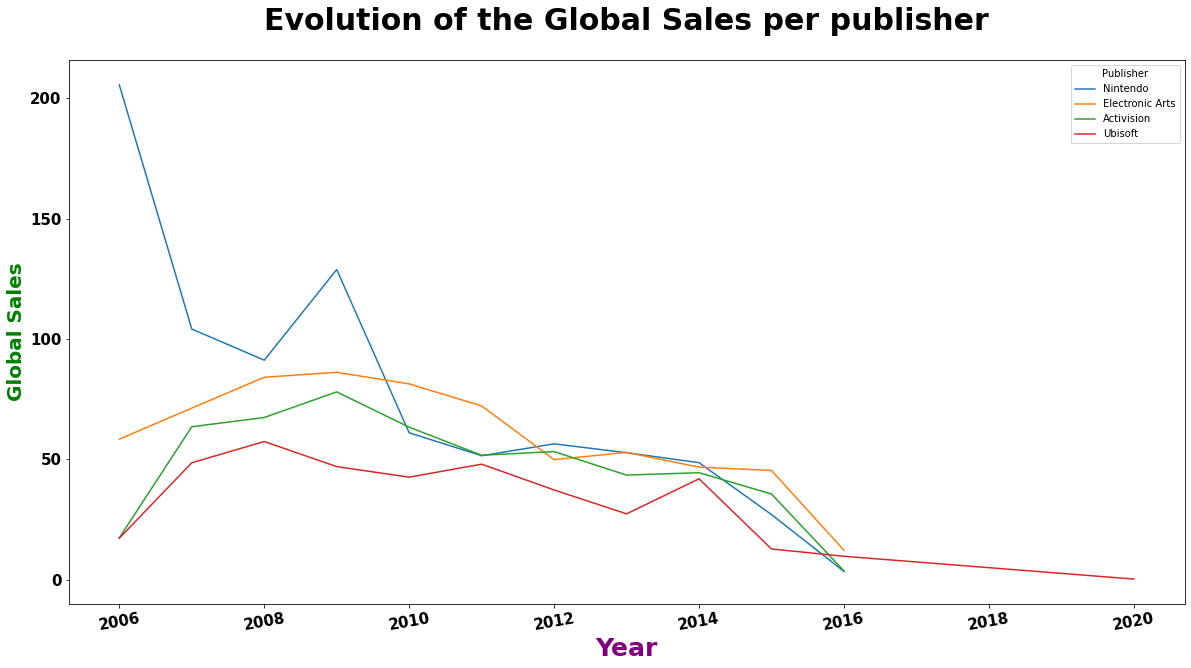

In [35]:
plt.figure(figsize=(20, 10)) # figuring the size
sns.lineplot(x='Year', y='Global_Sales', hue='Publisher',     
             data=df2)
plt.title( # title
    "Evolution of the Global Sales per publisher", 
    weight="bold", # weight
    fontsize=30, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Year", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10
)
plt.ylabel( # y-label
    "Global Sales", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);
plt.show()